In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import log, exp

# Расчет дебитов

In [8]:
TaskTargetRate = {
    "base_prop": {
        "calc_id": "",
        "calc_type": "optimal",
        "segment_count": 20,
        "test_type": "kpd",
        "border_form": "rectangle",
        "border_type": "n",
        "border_type_z": "nn"
    },
    "target": {
        "time_step": 0.01,
        "time_zero": 1,
        "number_of_steps": 100,
        "cummulative_work_time": 100,
        "work_type": {
            "is_periodic": False,
            "p_bhp": 150,
            "work_periods_time": []
        },
        "lift_prop": False
    },
    "unit": {
        "skin": 0,
        "h_eff": 10,
        "vertical_offset": 0.5,
        "perfres_ratio": 1,
        "ksk_ratio": 8.33,
        "skin_r": 0.455,
        "wellbore_prop": {
            "wellbore_type": "vertical",
            "wellbore_r": 0.1,
            "afterinflow_model_name": "Stable",
            "afterinflow_coef": 0,
            "p_additional": "None",
            "redistribution_fase_time": "None",
            "horisontal_wellbore_length": "None",
            "horisontal_wellbore_perf_ratio": "None",
            "horisontal_perf_count": "None",
            "zenit_degree": 0,
            "permiability": "None"
        },
        "layer_prop": {
            "permiability": 10,
            "kvkh_ratio": 0.1,
            "compressability": 0.00012,
            "porosity": 0.2,
            "p_res_init": 250,
            "viscosity_oil": 1,
            "b_oil": 1.2,
            "res_model_type": "Homogenius",
            "f_compressability": 0.0001,
            "f_porosity": 0.001,
            "lambda": 0.00001,
            "internal_r": "None",
            "kmu_in_out_ratio": 2,
            "kmuphict_in_out_ratio": 2,
            "reserves": {
                "prod_inj_ratio": 1,
                "oil_sutturatuion": 0.64,
                "k_displasment": 0.56,
                "fludding_k": 0.7,
                "wct_init": 0,
                "overfluding_k": 0.016,
                "b_arps": 0.9
            },
            "grp_prop": "None",
            "layer_count": 1,
            "xe": 500,
            "ye": 500,
            "lc_ratio": 0.5,
            "wc_rectangle_ratio": 0.5
        }
    }
}

In [9]:
response_target_rate = requests.post(r"http://192.168.3.247:40000/calc_flow_rate", json=TaskTargetRate)
response_target_rate.text

'{"calc_id":"","result":{"flow_rate_result":[98.2414082279557,97.28450630505098,96.34551897540867,95.42396469272153,94.51937835525916,93.63131065817603,92.75932741881726,91.90300900026106,91.06194972971764,90.2357573330782,89.42405242562833,88.62646798892602,87.84264889818657,87.07225147152644,86.31494301128646,85.5704013949361,84.83831467857883,84.11838068765067,83.41030668008746,82.71380897570086,82.02861262227721,81.35445107237447,80.69106587621765,80.03820638776081,79.3956294818587,78.76309926192339,78.1403868402036,77.52727004487564,76.92353322089593,76.32896695519608,75.74336789852005,75.16653852117025,74.59828692985572,74.03842665764093,73.48677648501148,72.94316026520862,72.40740678510386,71.87934962602196,71.35882707666553,70.8456820574574,70.3397620369111,69.84091891091833,69.349008750163,68.86389135075362,68.3854295760392,67.91348846039439,67.44793430523835,66.98863407110032,66.53545543445267,66.08826798511562,65.64694563464481,65.21136994248386,64.78143324502699,64.35703983

In [10]:
flow_rate = response_target_rate.json()["result"]["flow_rate_result"]
t = response_target_rate.json()["result"]["t"]

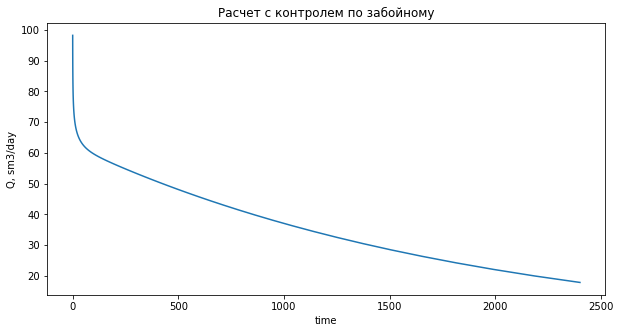

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(t, flow_rate)
plt.title("Расчет с контролем по забойному")
plt.xlabel("time") 
plt.ylabel("Q, sm3/day");

# Расчет давлений

In [12]:
TaskTargetPbhp = {
    "base_prop": {
        "calc_id": "",
        "calc_type": "optimal",
        "segment_count": 20,
        "test_type": "kpd",
        "border_form": "rectangle",
        "border_type": "n",
        "border_type_z": "nn"
    },
    "target": {
        "time_step": 0.01,
        "number_of_steps": 100,
        "cummulative_work_time": 100,
        "test_time": 1000,
        "work_type": {
            "is_periodic": False,
            "q_liq": 50,
            "work_periods_time": []
        }
    },
    "unit": {
        "skin": 0,
        "h_eff": 10,
        "vertical_offset": 0.5,
        "perfres_ratio": 1,
        "ksk_ratio": 8.33,
        "skin_r": 0.455,
        "wellbore_prop": {
            "wellbore_type": "vertical",
            "wellbore_r": 0.1,
            "afterinflow_model_name": "Stable",
            "afterinflow_coef": 0,
            "p_additional": "None",
            "redistribution_fase_time": "None",
            "horisontal_wellbore_length": "None",
            "horisontal_wellbore_perf_ratio": "None",
            "horisontal_perf_count": "None",
            "zenit_degree": 0,
            "permiability": "None"
        },
        "layer_prop": {
            "permiability": 10,
            "kvkh_ratio": 0.1,
            "compressability": 0.00012,
            "porosity": 0.2,
            "p_res_init": 250,
            "viscosity_oil": 1,
            "b_oil": 1.2,
            "res_model_type": "Homogenius",
            "f_compressability": 0.0001,
            "f_porosity": 0.001,
            "lambda": 0.00001,
            "internal_r": "None",
            "kmu_in_out_ratio": 2,
            "kmuphict_in_out_ratio": 2,
            "reserves": {
                "prod_inj_ratio": 1,
                "oil_sutturatuion": 0.64,
                "k_displasment": 0.56,
                "fludding_k": 0.7,
                "wct_init": 0,
                "overfluding_k": 0.016,
                "b_arps": 0.9
            },
            "grp_prop": "None",
            "layer_count": 1,
            "xe": 500,
            "ye": 500,
            "lc_ratio": 0.5,
            "wc_rectangle_ratio": 0.5
        }
    }
}

In [13]:
response_pbhp = requests.post(r"http://192.168.3.247:40000/calc_p_bhp", json=TaskTargetPbhp)
response_pbhp.text

'{"calc_id":"","result":{"p_wf_result":[217.7162871393959,217.21156548130654,216.70615957539073,216.2001165499438,215.6934805970588,215.186293121,214.67859288338025,214.1704161423673,213.6617967885129,213.15276647754655,212.64335475788144,212.13358919100426,211.62349547092992,211.1130975367208,210.60241767803996,210.0914766391061,209.5802937152005,209.06888684530355,208.55727269788648,208.04546675685367,207.53348339790566,207.02133596315315,206.50903682714696,205.9965974683055,205.48402852610934,204.97133985962225,204.45854060289642,203.94563921346207,203.43264352268656,202.9195607770469,202.40639768360384,201.89316044522297,201.37985479712296,200.86648604272008,200.35305908631636,199.83957845535417,199.32604833509467,198.8124725923601,198.29885479855218,197.78519824744367,197.27150598270003,196.75778081247466,196.24402533015544,195.73024192395434,195.21643280290104,194.70259999857188,194.18874538851045,193.67487070268072,193.16097753464462,192.64706735346326,192.13314151571888,191.619

In [14]:
pbhp = response_pbhp.json()["result"]['p_wf_result']
t = response_pbhp.json()["result"]["t"]

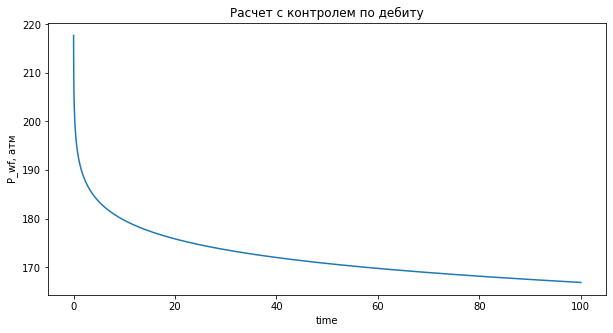

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(t, pbhp)
plt.title("Расчет с контролем по дебиту")
plt.xlabel("time") 
plt.ylabel("P_wf, атм");